<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday June 15**. Your solutions to theoretical questions should be **done in Markdown/MathJax** directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 pts] Problem 1

Access the data from URL https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  These data are a subset from a much larger study dealing with child health and development.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html#babies, and a brief summary is given below.

- **bwt**: birth weight (ounces; 999 if unknown) 
- **gestation**: length of pregnancy in days (999 if unknown)
- **parity**: 0=first born, 9=unknown
- **age**: mother's age in years
- **height**: mother's height in inches (99 if unknown)
- **weight**: mother's prepregnancy weight in pounds (999 if unknown)
- **smoke**: smoking status of mother; 0=not now, 1=yes now, 9=unknown

These data are also available on the course Piazza page, under the Resources tab.

In [276]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1


**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [277]:
condition1 = df["bwt"] != 999
condition2 = df["gestation"] != 999
condition3 = df["parity"] != 9
condition4 = df["age"] >= 0
condition5 = df["height"] != 99
condition6 = df["weight"] != 999
condition7 = df["smoke"] != 9
dfBabies = df.loc[condition1&condition2&condition3&condition4&condition5&condition6&condition7].copy()

print("Original: ", len(df))
print("Clean: ", len(dfBabies))

Original:  1236
Clean:  1175


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

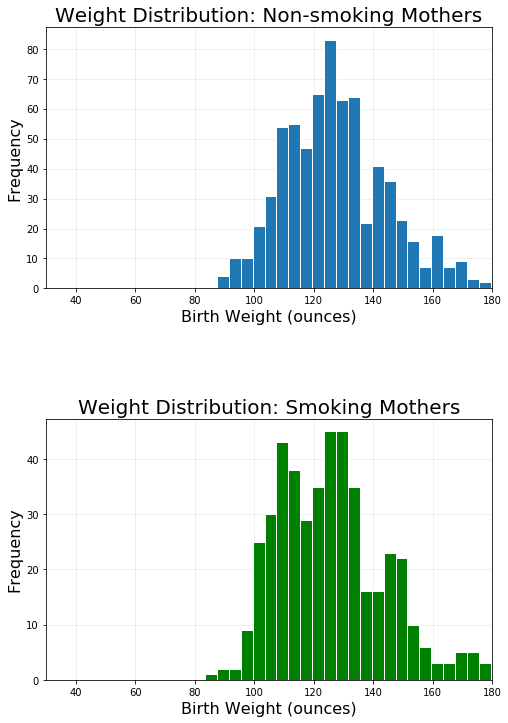

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,12))
dfBabies.loc[dfBabies['smoke']==0].hist(column = 'weight', bins=np.arange(27.5, 252.5, 4), ax = axes[0], edgecolor = "white")
axes[0].set_title("Weight Distribution: Non-smoking Mothers", fontsize=20)
axes[0].set_xlabel("Birth Weight (ounces)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
dfBabies.loc[dfBabies['smoke']==1].hist(column = 'weight', bins=np.arange(27.5, 252.5, 4), ax = axes[1], facecolor = "green", edgecolor = "white")
axes[1].set_title("Weight Distribution: Smoking Mothers", fontsize=20)
axes[1].set_xlabel("Birth Weight (ounces)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

axes[0].set_xlim([30,180])
axes[1].set_xlim([30,180])

axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

fig.subplots_adjust(hspace=.5)

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers.

**Non-Smoking Mothers:**

Unimodal and symmetric/slightly positively skewed

**Smoking Mothers:**

possibly multimodal(modes around 110, 130, and 150 ounces) and positively skewed

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [279]:
nonSmMean = dfBabies.loc[dfBabies['smoke']==0]['weight'].mean()
smMean = dfBabies.loc[dfBabies['smoke']==1]['weight'].mean()
nonSmMed = dfBabies.loc[dfBabies['smoke']==0]['weight'].median()
smMed = dfBabies.loc[dfBabies['smoke']==1]['weight'].median()

print("Smoker?\tMean (oz)\tMedian (oz)\nYes\t"+'%.2f'%smMean+'\t\t'+'%.2f'%smMed+'\nNo\t'+'%.2f'%nonSmMean+'\t\t'+'%.2f'%nonSmMed)
print()
print("Mean Difference: "+'%.2f'%(nonSmMean-smMean))
print("Median Difference: "+'%.2f'%(nonSmMed-smMed))

Smoker?	Mean (oz)	Median (oz)
Yes	126.94		125.00
No	129.48		126.00

Mean Difference: 2.54
Median Difference: 1.00


Since the histogram of birth weights for the smoking mothers is not symmetric and multimodal the mean is the average of multiple populations not at the actual value of the mean, so it doesn't directly represent the most common birth weights.  

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture, and be sure to label your axes and any relevant components of the plot!

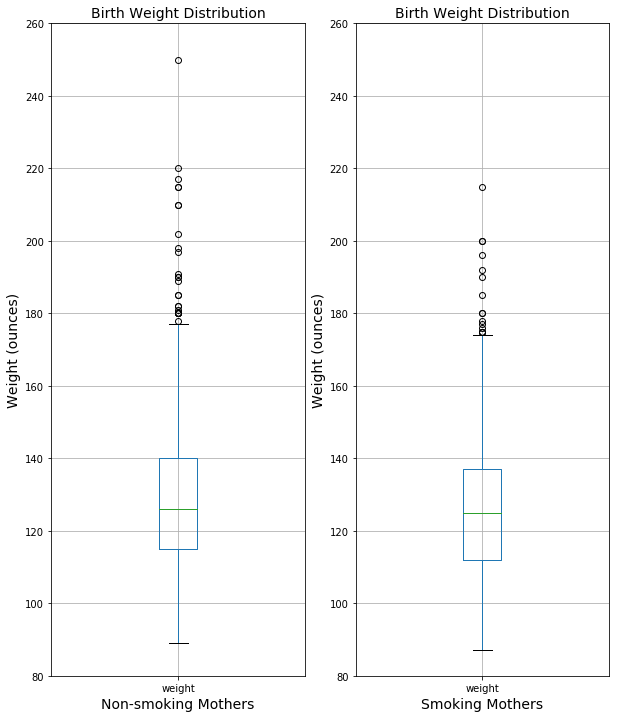

In [307]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,12))
dfBabies.loc[dfBabies['smoke']==0].boxplot(column = 'weight', ax = axes[0])
dfBabies.loc[dfBabies['smoke']==1].boxplot(column = 'weight', ax = axes[1])

axes[0].set_title("Birth Weight Distribution", fontsize=14)
axes[1].set_title("Birth Weight Distribution", fontsize=14)

axes[0].set_ylim([80,260])
axes[1].set_ylim([80,260])

axes[0].set_xlabel("Non-smoking Mothers", fontsize=14)
axes[1].set_xlabel("Smoking Mothers", fontsize=14)

axes[0].set_ylabel("Weight (ounces)", fontsize=14)
axes[1].set_ylabel("Weight (ounces)", fontsize=14)

fig.subplots_adjust(hspace=.5);


**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

**Non-Smoking Mothers:**

The median bisects the IQR pretty evenly, however it is slightly lower than halfway in-between, so the number with smaller birth weights is slightly larger than those with birthweights above the median. The outliers above the upper bound whisker have a pretty large range. 

**Smoking Mothers:**

The median bisects the IQR almost in the middle, so the weights are distributed pretty evenly on either side of the median. The outliers above the upper bound whisker are mostly clustered near the whisker. 

**Smoking vs. Non-Smoking Mothers:**

Overall, the plots are pretty similar.The medians are close, but this is because the IQR for the non-smoking mothers is slightly higher than the IQR for smoking mothers while the median of the non-smoking mothers is skewed slightly negative, so the two differences sort of cancel out such that the medians for the two classes are roughly the same. The spread and number of outliers above the upper whisker are greater for the non-smoking mothers than for the smoking mothers.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.


$ p(R_5) = p(R_5|F)p(F) + p(R_5|S)p(S) + p(R_5|T)p(T)$

$p(R_5|F) = 0 \hspace{1 cm} p(F) = \frac {28}{40}$

$p(R_5|S) = \frac16 \hspace{1 cm} p(S) = \frac {10}{40}$

$p(R_5|T) = \frac1{20} \hspace{1 cm} p(T) = \frac {2}{40}$

Substituting in the values above:

$ p(R_5) = 0.0442$


**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

$$p(S|R_5) = \frac{p(S \cap R_5)}{p(R_5)}$$

$$p(S \cap R_5) = p(R_5|S)p(S)$$

$$p(S|R_5) = \frac{p(R_5|S)p(S)}{p(R_5)}$$
$$p(S|R_5) = \frac{(\frac16)(\frac14)}{0.0442}$$

$$p(S|R_5) = 0.943$$

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

If $R_5$ and $S$ are independent then:

$$p(S|R_5) = p(S)$$

However, from the calculations above, we know:

$$p(S|R_5)= 0.943 \neq 0.25 = p(S)$$

So the two events are **not independent**

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

$$p(F|E_1) = \frac{p(F \cap E_1)}{p(E_1)} = \frac{p(E_1|F)p(F)}{p(E_1)}$$

$$p(E_1) = p(E_1|F)p(F) + p(E_1|S)p(S) + p(E_1|T)p(T)$$

$$p(E_1) = (1)(\frac{28}{40}) + (\frac46)(\frac{10}{40}) + (\frac4{20})(\frac2{40}) = 0.8767$$

$$p(F|E_1) = \frac{(1)(\frac{28}{40})}{0.8767} $$

$$p(F|E_1) =0.7985$$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part C**.

$$p(F|E_n) = \frac{p(F \cap E_n)}{p(E_n)} = \frac{p(E_n|F)p(F)}{p(E_n)}$$

$$ p(E_n) = p(E_1|F)^np(F) + p(E_1|S)^np(S) + p(E_1|T)^np(T)$$

$$p(E_n|F) = 1$$

$$p(F|E_n) = \frac{\frac{28}{40}}{(1)^n(\frac{28}{40}) + (\frac46)^n(\frac{10}{40}) + (\frac4{20})^n(\frac2{40})}$$

$$p(F|E_n) = \frac{28}{28 + (\frac23)^n(10) + (\frac15)^n(2)}$$


In [281]:
def prob_four(n):
    return 28/(28+10*(2/3)**n+2*(1/5)**n)

print("Answer to Part C: ", '%.4f'%prob_four(1))

Answer to Part C:  0.7985


Part C Answer (by hand): 0.7985

Part C Answer (by prob_four): 0.7985

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [282]:
n = 1
prob = 0
while prob <= 0.95:
    prob = prob_four(n)
    n += 1
print("The minimum number of successive rolls is", n)

The minimum number of successive rolls is 6


***
<a/ id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3

When Chris and Dan leave work in the CU Engineering Center ($E$), they each head for one of five other locations: the Gym to get big ($G$), the Library to get learned ($L$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H$), or to Brewing Market to have a nice Coffee ($C$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Chris and/or Dan is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Chris and Dan, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Chris goes from one place to another is independent of the probability of Dan's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Compute (by hand) the probability that Dan ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

$$p(L) = p(L|R)p(R) + p(L|G)p(G) + p(L|L)p(L) + p(L|C)p(C)$$

$$p(L) = 0 + (\frac14)(\frac14) + 0 + (\frac13)(\frac14)$$

$$p(L) = 0.1458$$

**Part B**: Compute (by hand) the probability that Chris ends up at the Gym _either_ as his first _or_ second location visited after leaving the Reservsoir. (Again, assume that Chris wanders the streets of Boulder randomly using the same rules described above.)

$G_1 = $ gym as first location

$G_2 = $ gym as second location

$p(G) = p(G_1) + p(G_2)$

$p(G_1) = \frac12$

$p(G_2) = p(G|E)p(E) = \frac14*\frac12 = \frac18$

$p(G) = \frac58 = 0.625$

**Part C**: Suppose that Chris works late at the Engineering Center, while Dan goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above. 
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**1.**

$R_1$ = running into each other on first move

$X_Y$ = Y person goes to place X

$p(R_1) = p(G_D)p(G_C) + p(L_D)p(L_C) + p(C_D)p(C_C)$

$p(R_1) = (\frac13*\frac14) + (\frac13*\frac14) + (\frac13*\frac14)$

$p(R_1) = \frac3{12}=0.25$

**2.**

$X_{Yn}$ = Y person goes to place X on the $n^{th}$ move

$p($both go to the hill on move 2$) = p(H_{C2})*p(H_{D2})$

$p(H_{C2}) = p(H_{C2}|C_{C1})p(C_{C1}) + p(H_{C2}|L_{C1})p(L_{C1})+p(H_{C2}|G_{C1})p(G_{C1}) + p(H_{C2}|R_{C1})p(R_{C1})$

$p(H_{C2}) = (\frac13*\frac14) + (\frac14*\frac14)+(\frac14*\frac14) + 0$

$p(H_{C2}) = \frac5{24}$

$p(H_{D2}) = p(H_{D2}|C_{D1})p(C_{D1}) + p(H_{D2}|L_{D1})p(L_{D1})+p(H_{D2}|G_{D1})p(G_{D1})$

$p(H_{D2}) = (\frac13*\frac13) + (\frac14*\frac13)+(\frac14*\frac13)$

$p(H_{D2}) = \frac{15}{54}$

$p($both go to the hill on move 2$) = \frac5{24}*\frac{15}{54}$

$p($both go to the hill on move 2$) = 0.0579$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** (both parts of C) are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [306]:
#locations and their respective possible moves
movesFromH = {'place' : np.array(["C","L","G"]), 'probs' : np.full(3, 1/3)}
movesFromC = {'place' : np.array(["H","L","E"]), 'probs' : np.full(3, 1/3)}
movesFromL = {'place' : np.array(["H","C","E", "G"]), 'probs' : np.full(4, 1/4)}
movesFromG = {'place' : np.array(["H","L","E", "R"]), 'probs' : np.full(4, 1/4)}
movesFromE = {'place' : np.array(["C","L","G", "R"]), 'probs' : np.full(4, 1/4)}
movesFromR = {'place' : np.array(["E","G"]), 'probs' : np.full(2, 1/2)}
#mapping the location key to their movesFromX from above
keys = ["H","C","L","G", "E", "R"]
values = [movesFromH, movesFromC, movesFromL, movesFromG, movesFromE, movesFromR]
allMoves= dict(zip(keys, values))

def nextMove(X): #given starting place, return random adjacent location
    return np.random.choice(allMoves[X]['place'], p = allMoves[X]['probs'])

def multiMove(X,n): #will keep moving along map for the number of specified steps, n, starting at location X, returns final position
    if n == 1:
        return nextMove(X) 
    return multiMove(nextMove(X), n-1)

num_samples = 10000

#Part A
start = 'E'
end = 'L'
steps = 2

allSecMoves = np.array([multiMove(start,steps) for ii in range(num_samples)])

endAtL = allSecMoves == end

partA = sum(endAtL)/num_samples
print("Part A Simulation: ", '%.4f'%partA)

#Part B
start = 'R'
end = 'G'

firstLoc = np.array([multiMove(start,1) for ii in range(num_samples)])
secLoc = np.array([multiMove(start,2) for ii in range(num_samples)])

endAtG1 = firstLoc == end
endAtG2 = secLoc == end

partB = sum(endAtG1)/num_samples + sum(endAtG2)/num_samples

print("Part B Simulation: ", '%.4f'%partB)

#Part C
#Part 1

start1 = 'E'
start2 = 'H'

meetAtFirst = np.array([multiMove(start1,1)==multiMove(start2,1) for ii in range(num_samples)])

partC1 = sum(meetAtFirst)/num_samples

#Part 2

meetAtHillSec = np.array([((multiMove(start1,2)=='H')and(multiMove(start2,2)=='H')) for ii in range(num_samples)])

partC2= sum(meetAtHillSec)/num_samples

print("Part C, Part 1 Simulation: ", '%.4f'%partC1)

print("Part C, Part 2 Simulation: ", '%.4f'%partC2)

Part A Simulation:  0.1418
Part B Simulation:  0.6218
Part C, Part 1 Simulation:  0.2478
Part C, Part 2 Simulation:  0.0625


The nextMove function uses sets of possible moves from each location and their associated probabilities and randomly chooses the next location based on the starting point passed into the function. 

The recursive function multiMove returns the final position after n steps by recursively calling the function passing the nextMove position and decrementing n by 1 each call. 

For part A, the code calls multiMove, starting at the given position and moving 2 steps. The final position for each trial is stored in an array and compared to the target final position. From the final position comparisons the probability is computed. 

For part B, multiMove is called twice with the same starting point but two different step sizes, 1 and 2. The final positions are stored in separate arrays for each step size and then compared to the target final position as above to find the simulated probability of ending at the target location using either step size. 

For partC1, multiMove is called twice with a different starting location but same step size each time. The results are compared to each other to determine if the final locations are the same. The array storing the results is used to calculate the simulated probability of ending at the same location starting at the different locations.

For part C2, multiMove is called twice with a different starting location but same step size each time. The results are compared to the target final location and the result of the comparisons is stored in an array. If both end at the target location, then a 1 is stored, otherwise a 0 (as with any bool). This array of results is used to calculate the simulated probability of both people ending at 'H' after two steps.

All of the simulations are run 10,000 times each, so the final outcomes for each part should be a good approximation of the actual probability. 

***
<a/ id='p4'></a>
[Back to top](#top)

### [30 points] Problem 4


In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [297]:
sixSided = {'roll' : np.array(range(1,7)), 'probs' : np.full(6, 1/6)}
cards = {'card' : np.array([-100, -50, 50, 100, 200]), 'probs' : np.full(5, 1/5)}
drawCard = [2,7,17,22,33,36]
noAct = [0,10,20]
def rollTwice(): #returns the sum of two rolls, and whether the rolls were the same #
    roll1 = np.random.choice(sixSided['roll'], p=sixSided['probs'])
    roll2 = np.random.choice(sixSided['roll'], p=sixSided['probs'])
    return (roll1+roll2, roll1==roll2)

def miniopoly_turn(state, cash):
    rollResults = rollTwice()
    if state == 30: #start in jail
        if rollResults[1] == 1: #get out of jail
            state = (10 + rollResults[0])
        else: #stay in jail, lose $, do nothing
            cash = cash -20
            if cash<0:
                cash = 0
            return state, cash
    else: #start not in jail!
        state += rollResults[0] #move forward
        if state >= 40: #if land on or pass Go
            cash += 200 #get $
            state = state%40 #modify state so it loops
            
    #after moving, check position and act accordingly
    if state not in noAct:
        if state in drawCard: #draw card if landing on appropriate square
            cash += np.random.choice(cards['card'], p = cards['probs']) #randomly picks card and modifies cash
        elif state == 30: #if land in jail
            return state, cash #do nothing
        else: #for all other positions, subtract position value from cash
            cash -= state
    if cash < 0: #if bankrupt at end, set cash = 0
        cash = 0
    return state, cash 



**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. Be sure to label your axes!

In [298]:
def simGame(numTurns):
    cash = 200
    state = 0
    jail = False
    while numTurns > 0 and cash !=0:
        if state == 30:
            jail = True
        results = miniopoly_turn(state, cash)
        state = results[0]
        cash = results[1]
        if state == 30:
            jail = True
        numTurns -= 1
    return cash, jail
numSims = 5000
allSims = np.array([simGame(30)[0] for i in range(numSims)])
simWentToJail = np.array([simGame(30)[1] for i in range(numSims)])        

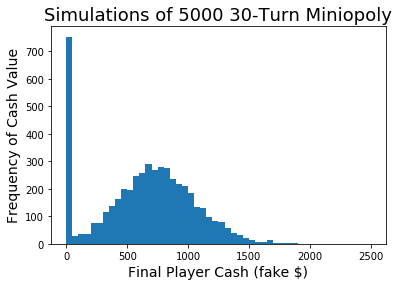

In [305]:
my_bins = np.arange(-0.5, 2500.5, 50)
plt.hist(allSims, bins = my_bins)
plt.title('Simulations of 5000 30-Turn Miniopoly', fontsize=18);
plt.ylabel('Frequency of Cash Value',fontsize=14 )
plt.xlabel('Final Player Cash (fake $)',fontsize=14 );


**Part C**: Use your codes to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [303]:
bankrupt = allSims == 0
probBankrupt = sum(bankrupt)/numSims
print("Probability Going Bankrupt in <= 30 Turns: ", '%.4f'%probBankrupt)

Probability Going Bankrupt in <= 30 Turns:  0.1466


**Part D**: Use your codes to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [304]:
numWentToJail = sum(simWentToJail)
jailAndBankrupt = simWentToJail.copy()

nojailAndBankrupt = simWentToJail.copy()
condition1 = simWentToJail == 1
condition2 = bankrupt == 1
for i in range(numSims):
    x = 0
    if simWentToJail[i] == 1 and bankrupt[i] == 1:
        x=1
    jailAndBankrupt[i] = x



numJailAndBankrupt = sum(jailAndBankrupt)

probBgivenJ = numJailAndBankrupt/numWentToJail

print("Prob. of Bankruptcy Given Jail: ", '%.4f'%probBgivenJ)

Prob. of Bankruptcy Given Jail:  0.1440


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

$$p(J|B) = \frac{p(B|J)p(J)}{p(B)}$$

so still need to find $p(J)$

In [302]:
pJ = numWentToJail/numSims
pJgivenB = (probBgivenJ*pJ)/probBankrupt
print("Prob. of Jail >= 1 time Given Bankruptcy: ", '%.4f'%pJgivenB)

Prob. of Jail >= 1 time Given Bankruptcy:  0.5017
